In [2]:
import random
import math 
import time #to calc execution time 
import numpy as np #used for numerical oper and random city coordinate generation 
import matplotlib.pyplot as plt #visualize the tsp path 

In [3]:
def generate_cities (n): 
    return np.random.rand(n,2)

#generate n cities as 2D coordinates 
    #each city has x and y values 
#returns array of shape (n,2)
#n - no of cities 
#2 - each city ahs 2 coordinates x and y in range 0-1 

In [4]:
def distance(city1, city2):
    return np.linalg.norm (city1 - city2)

#calculates the euclidean dist btn 2 cities 
#also called as L2 norm 
#math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
#The straight-line distance between two points in 2D space.

In [5]:
def total_distance(route, cities):
    return sum(
        distance(cities[route[i]], cities[route[i+1]]) 
        #Calculates distance between consecutive cities.
       
        for i in range(len(route)-1) #Loops through each city in the tour 
    ) + distance(cities[route[-1]], cities[route[0]]) #adds return trip from last city to back 
    



In [10]:
def greedy_best_first_search(cities):
    n = len(cities) #Gets the number of cities
    unvisited = list(range(n)) #
    route = [unvisited.pop(0)]  # Start from city 0 - marks it as starting point 
#intializes route with start city 
    while unvisited: #Loops until all cities are visited.
        last = route[-1] #last city visited 
        next_city = min(unvisited, key=lambda city: distance(cities[last], cities[city]))
#min - Finds the nearest unvisited city (based on Euclidean distance) — this is the greedy heuristic.
#LAMBDA - anonymous fun 
#takes city from unvisited list 
# Returns the distance between: cities[last] (the last city we visited) 
#cities[city] (each possible next city)

        route.append(next_city) #	Adds the selected city to the route
        unvisited.remove(next_city) #Removes it from the unvisited list.
    return route #returns full route 

In [11]:
def visualize_tsp(cities, route, title="TSP using Greedy Best-First Search"):
    plt.figure(figsize=(8, 6))
     
    for i in range(len(route)): #Loops through each city in the tour.
        start = cities[route[i]] #Gets the coordinates of current and next city.
        end = cities[route[(i + 1) % len(route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
        plt.text(start[0], start[1], str(route[i]), fontsize=12, color='red')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

TSP Route: [0, 8, 4, 5, 6, 3, 1, 2, 9, 7]
Total Distance (Cost): 2.968
Execution Time: 0.0008 seconds


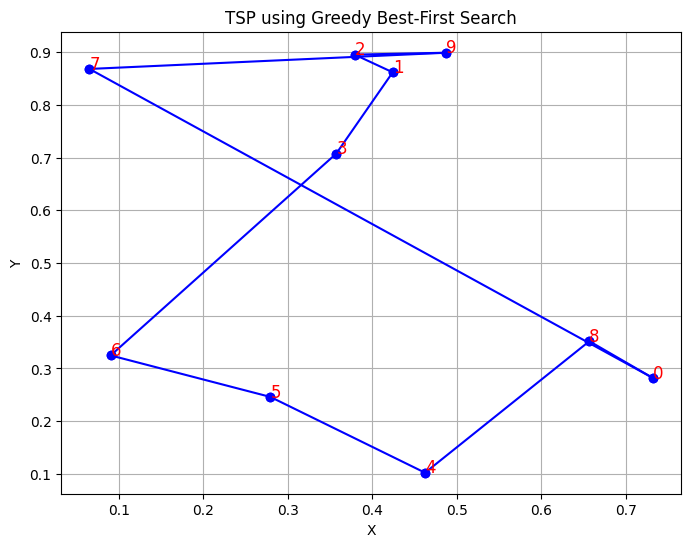

In [12]:
if __name__ == "__main__":
    num_cities = 10 #Creates 10 random cities with (x, y) coordinates.
    cities = generate_cities(num_cities)

    #Records start time, runs the algorithm, calculates cost, and records end time.
    start_time = time.time()
    route = greedy_best_first_search(cities)
    cost = total_distance(route, cities)
    end_time = time.time()

    #prints
    print("TSP Route:", route)
    print("Total Distance (Cost):", round(cost, 3))
    print("Execution Time:", round(end_time - start_time, 4), "seconds")

    visualize_tsp(cities, route)